# **QFT rotating phases**

In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, QuantumRegister, ClassicalRegister, execute, BasicAer
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
import math
%matplotlib inline

In [3]:
# Set up the program
signal = QuantumRegister(4, name='signal')
qc = QuantumCircuit(signal)

In [4]:
def main():

    ## Rotate kth state in register by k times 20 degrees
    phi = 20;

    ## First HAD so that we can see the result for all k values at once
    qc.h(signal);

    ## Apply 2^k phase operations to kth qubit
    for i in range(4):
        val = 1 << i
        for j in range(val):
            qc.rz(math.radians(phi), signal[i]);

In [5]:
def QFT(qreg):
    ## This QFT implementation is adapted from IBM's sample:
    ##   https://github.com/Qiskit/qiskit-terra/blob/master/examples/python/qft.py
    ## ...with a few adjustments to match the book QFT implementation exactly
    n = len(qreg)
    for j in range(n):
        for k in range(j):
            qc.cu1(-math.pi/float(2**(j-k)), qreg[n-j-1], qreg[n-k-1])
        qc.h(qreg[n-j-1])
    # Now finish the QFT by reversing the order of the qubits
    for j in range(n//2):
        qc.swap(qreg[j], qreg[n-j-1])

main()

In [6]:
backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()

|0> (-0.217-0.125j) probability = 6.2714%
|1> (-0.161-0.192j) probability = 6.2785%
|2> (-0.086-0.235j) probability = 6.2621%
|3> -0.25j probability = 6.25%
|4> (0.086-0.235j) probability = 6.2621%
|5> (0.161-0.192j) probability = 6.2785%
|6> (0.217-0.125j) probability = 6.2714%
|7> (0.246-0.043j) probability = 6.2365%
|8> (0.246+0.043j) probability = 6.2365%
|9> (0.217+0.125j) probability = 6.2714%
|10> (0.161+0.192j) probability = 6.2785%
|11> (0.086+0.235j) probability = 6.2621%
|12> (-0+0.25j) probability = 6.25%
|13> (-0.086+0.235j) probability = 6.2621%
|14> (-0.161+0.192j) probability = 6.2785%
|15> (-0.217+0.125j) probability = 6.2714%


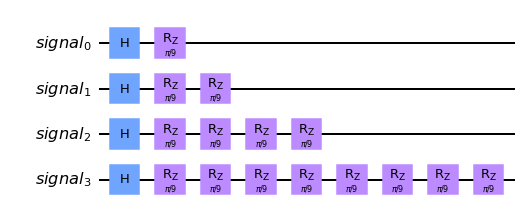

In [7]:
outputstate = result.get_statevector(qc, decimals=3)
for i,amp in enumerate(outputstate):
    if abs(amp) > 0.000001:
        prob = abs(amp) * abs(amp)
        print('|{}> {} probability = {}%'.format(i, amp, round(prob * 100, 5)))
qc.draw()        # draw the circuit